# ЛР 1

## Задание
1. Считать изображение с камеры
2. Перевести в серошкальный формат
3. Провести эквализацию гистограммы
4. Выделить границы на изображении
5. Добавить на изображение элипсы произвольного цвета (использовать random)
6. Добавить на изображение лого OpenCV
7. Сохранить результат в формате PNG

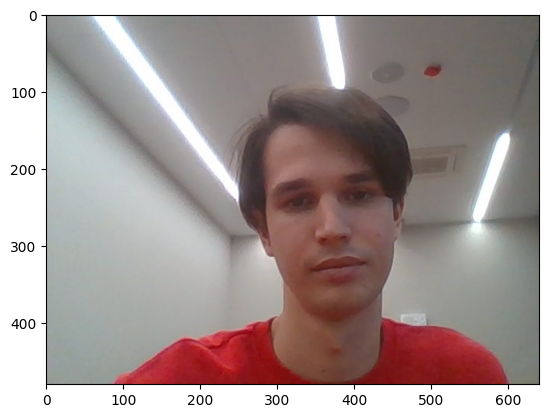

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 1. Считать изображение с камеры
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
cap.release()


gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(gray, cmap='gray');


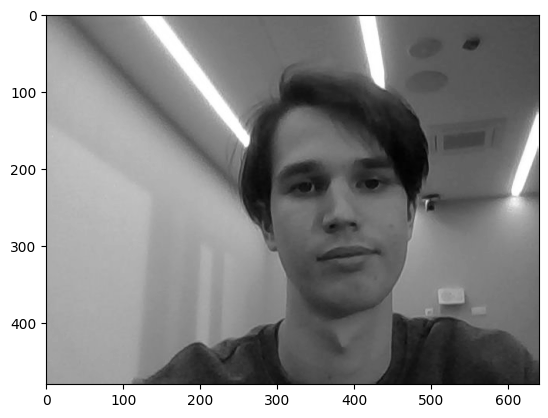

In [8]:
# 2. Перевести в серошкальный формат
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray');

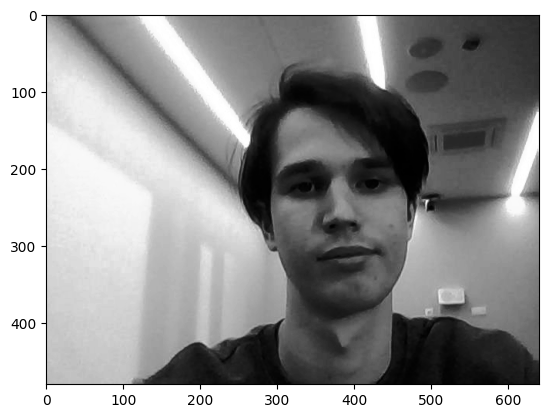

In [9]:
# 3. Провести эквализацию гистограммы
equ = cv2.equalizeHist(gray)

plt.imshow(equ, cmap='gray');

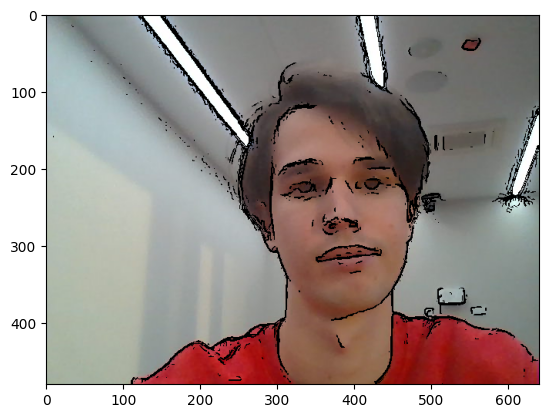

In [26]:
# Apply Sobel filter to detect edges - 4
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
magnitude = np.uint8(magnitude)
plt.imshow(magnitude, cmap='gray')

# Apply thresholding to create a binary mask
_, thresholded_magnitude = cv2.threshold(magnitude, 50, 255, cv2.THRESH_BINARY)
plt.imshow(thresholded_magnitude, cmap='gray')

thresholded_magnitude = cv2.bitwise_not(thresholded_magnitude)


# Apply the mask to the original frame
masked_frame = cv2.bitwise_and(frame, frame, mask=thresholded_magnitude)

# Display the masked frame
plt.imshow(cv2.cvtColor(masked_frame, cv2.COLOR_BGR2RGB));

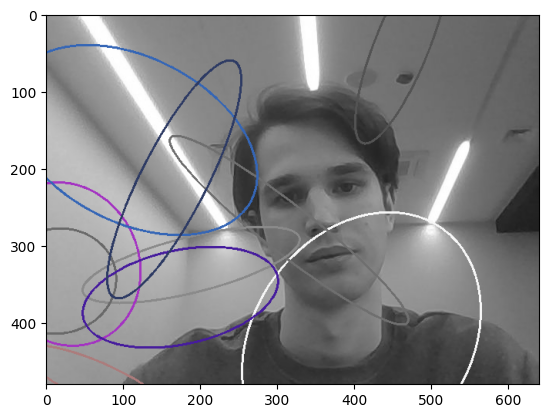

In [31]:
# 5. Добавить на изображение элипсы произвольного цвета

three_channel_image = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

num_ellipses = 5
for _ in range(num_ellipses):
    color = tuple(np.random.randint(0, 255, 3).tolist())
    center = tuple(np.random.randint(0, min(frame.shape[:2]), 2))
    axes = tuple(np.random.randint(10, 200, 2))
    angle = np.random.randint(0, 360)
    cv2.ellipse(three_channel_image, center, axes, angle, 0, 360, color, 2)


plt.imshow(cv2.cvtColor(three_channel_image, cv2.COLOR_BGR2RGB));

In [32]:
gray.shape

(480, 640)

In [33]:
three_channel_image.shape

(480, 640, 3)

In [34]:

# Load the logo
logo = cv2.imread('OpenCV_logo.png')

# Resize the logo to 50x50
resized_logo = cv2.resize(logo, (50, 50))

# Add the resized logo to the top of the frame
three_channel_image[0:50, 0:50] = resized_logo

# Save the result as a PNG
cv2.imwrite('result.png', three_channel_image);


In [1]:
import cv2
import numpy as np
import time

# Load the logo image
logo = cv2.imread('OpenCV_logo.png')
resized_logo = cv2.resize(logo, (50, 50))

# Initialize the video capture
cap = cv2.VideoCapture(0)
# Установка размера захвата
# Установка размера захвата
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 100)  # Установка ширины захвата
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1000)  # Установка высоты захвата



# Get the initial time for FPS calculation
start_time = time.time()
frame_count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply Sobel filter to detect edges - 4
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = np.uint8(magnitude)

    # Apply thresholding to create a binary mask
    _, thresholded_magnitude = cv2.threshold(magnitude, 50, 255, cv2.THRESH_BINARY)

    thresholded_magnitude = cv2.bitwise_not(thresholded_magnitude)

    # Apply the mask to the original frame
    three_channel_image = cv2.bitwise_and(frame, frame, mask=thresholded_magnitude)
    #three_channel_image = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

    num_ellipses = 10
    for _ in range(num_ellipses):
        color = tuple(np.random.randint(0, 255, 3).tolist())
        center = tuple(np.random.randint(0, min(frame.shape[:2]), 2))
        axes = tuple(np.random.randint(10, 200, 2))
        angle = np.random.randint(0, 360)
        cv2.ellipse(three_channel_image, center, axes, angle, 0, 360, color, 2)
    three_channel_image[0:50, 0:50] = resized_logo

    # Calculate and display the FPS
    frame_count += 1
    if frame_count >= 50:
        end_time = time.time()
        fps = frame_count / (end_time - start_time)
        print("FPS:", round(fps, 2))
        frame_count = 0
        start_time = time.time()

    # Display the three-channel image
    cv2.imshow('Three Channel Image', three_channel_image)

    # Check for the 'q' key to exit the demonstration
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close all windows
cap.release()
cv2.destroyAllWindows()


FPS: 22.06
FPS: 29.97
FPS: 30.18
